# Tixel Data Analysis

This notebook analyzes the Tixel event data stored in PostgreSQL.

In [1]:
import sys
import os
sys.path.append('/home/jovyan/work/analysis')
from database import Event, Ticket, get_db_session
from init_db import populate_database
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import func, create_engine
from datetime import datetime, timedelta

#plt.style.use('seaborn')
sns.set_palette('deep')
%matplotlib inline

In [2]:
print("Initializing database...")
populate_database()
print("Database initialized!")

Initializing database...
Loading data from S3...
Loading data.json from local cache...
Loading events/20241207_170551/all_events.json from local cache...
Loading most_recent_events_Sydney_music-tickets_20241118_083747.json from local cache...
Loaded 388 events
Loaded 388 events
Error processing event: 'str' object has no attribute 'get'
Skipping event 473900: missing required data
Error processing event: 'str' object has no attribute 'get'
Skipping event 499705: missing required data
Error processing event: 'str' object has no attribute 'get'
Skipping event 493063: missing required data
Error processing event: 'str' object has no attribute 'get'
Skipping event 467756: missing required data
Error processing event: 'str' object has no attribute 'get'
Skipping event 475758: missing required data
Processed 10 events
Error processing event: 'str' object has no attribute 'get'
Skipping event 459412: missing required data
Error processing event: 'str' object has no attribute 'get'
Skipping ev

In [3]:
# Database connection settings
DB_HOST = os.getenv('DB_HOST', 'db-1')
DB_PORT = os.getenv('DB_PORT', '5432')
DB_NAME = os.getenv('DB_NAME', 'tixel')
DB_USER = os.getenv('DB_USER', 'tixel')
DB_PASS = os.getenv('DB_PASS', 'tixel')

# Get both session and engine for different query types
session = get_db_session()
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")


In [4]:
# Basic statistics
total_events = session.query(Event).count()
total_tickets = session.query(Ticket).count()
print(f"Total events: {total_events}")
print(f"Total tickets: {total_tickets}")

Total events: 308
Total tickets: 76


In [5]:
# Load events into pandas for more complex analysis
events_df = pd.read_sql("""
    SELECT 
        id,
        title,
        start_time,
        end_time,
        venue_name,
        venue_city,
        category,
        genre,
        is_festival,
        snapshot_timestamp
    FROM events
""", engine)

tickets_df = pd.read_sql("""
    SELECT 
        id,
        event_id,
        price,
        currency,
        ticket_type,
        snapshot_timestamp
    FROM tickets
""", engine)

print(f"\nLoaded {len(events_df)} events and {len(tickets_df)} tickets")


Loaded 308 events and 76 tickets


In [6]:
tickets_df

,id,event_id,price,currency,ticket_type,snapshot_timestamp
0,1,493031,15.0,AUD,None,2024-12-07 07:12:34.186539
1,2,493031,15.0,AUD,None,2024-12-07 07:12:34.186539
2,3,493031,16.0,AUD,None,2024-12-07 07:12:34.186539
3,4,500150,30.0,AUD,None,2024-12-07 07:12:34.189501
4,5,500150,30.0,AUD,None,2024-12-07 07:12:34.189501
...,...,...,...,...,...,...
71,72,481731,70.0,AUD,None,2024-12-07 07:12:34.371629
72,73,481731,70.0,AUD,None,2024-12-07 07:12:34.371629
73,74,467709,15.0,AUD,None,2024-12-07 07:12:34.372833
74,75,494095,35.0,AUD,None,2024-12-07 07:12:34.382748


In [7]:
events_df

,id,title,start_time,end_time,venue_name,venue_city,category,genre,is_festival,snapshot_timestamp
0,473727,Jamie xx,2024-12-06 23:00:00,2024-12-07 12:59:59,Carriageworks,Sydney,Music,Electronic,False,2024-12-07 07:12:34.176068
1,493031,Good Things Official Afterparty | Sydney,2024-12-07 10:00:00,2024-12-07 12:59:59,Burdekin Hotel,Sydney,Music,Rock,False,2024-12-07 07:12:34.186539
2,500150,E-lie,2024-12-07 03:00:00,2024-12-07 12:59:59,Ivy Sydney (Club),Sydney,Music,EDM,False,2024-12-07 07:12:34.189501
3,499697,The Island Sydney: Beach Club Saturdays,2024-12-07 03:00:00,2024-12-07 12:59:59,Man O'War Steps,Sydney,Music,Techno,False,2024-12-07 07:12:34.191072
4,478055,Dylan Gossett,2024-12-07 08:30:00,2024-12-07 12:59:59,Roundhouse Sydney,Sydney,Music,Country,False,2024-12-07 07:12:34.192006
...,...,...,...,...,...,...,...,...,...,...
303,450257,Artemas,2024-11-30 09:00:00,2024-11-30 12:59:59,The Metro Theatre,Sydney,Music,Indie,False,2024-12-07 07:12:34.386714
304,460896,The Whitlams,2024-11-30 09:00:00,2024-11-30 12:59:59,City Recital Hall,Sydney,Music,Indie,False,2024-12-07 07:12:34.387241
305,492459,Tropical Fuck Storm,2024-11-30 09:00:00,2024-11-30 12:59:59,Crowbar Sydney,Sydney,Music,Rock,False,2024-12-07 07:12:34.387772
306,438081,SWITCH 011,2024-11-30 09:00:00,2024-11-30 12:59:59,"Selina's, Coogee Bay Hotel",Sydney,Music,Techno,False,2024-12-07 07:12:34.388359


## Event Analysis

In [8]:
# Events by category
print("\nEvents by category:")
print(events_df['category'].value_counts())

# Events by city
print("\nEvents by city:")
print(events_df['venue_city'].value_counts().head())

# Festival vs non-festival events
print("\nFestival vs Non-Festival Events:")
print(events_df['is_festival'].value_counts())


Events by category:
category
Music      205
Theatre     91
Sports      10
Comedy       2
Name: count, dtype: int64

Events by city:
venue_city
Sydney    308
Name: count, dtype: int64

Festival vs Non-Festival Events:
is_festival
False    305
True       3
Name: count, dtype: int64


In [9]:
# Average ticket prices by category
price_stats = tickets_df.merge(
    events_df[['id', 'category']], 
    left_on='event_id', 
    right_on='id'
).groupby('category').agg({
    'price': ['mean', 'min', 'max', 'count']
}).round(2)

print("\nTicket price statistics by category:")
print(price_stats)

# Ticket types distribution
print("\nTicket types distribution:")
print(tickets_df['ticket_type'].value_counts().head())


Ticket price statistics by category:
           price                   
            mean   min    max count
category                           
Music      69.30  15.0  340.0    50
Theatre   131.38  28.0  315.0    26

Ticket types distribution:
Series([], Name: count, dtype: int64)


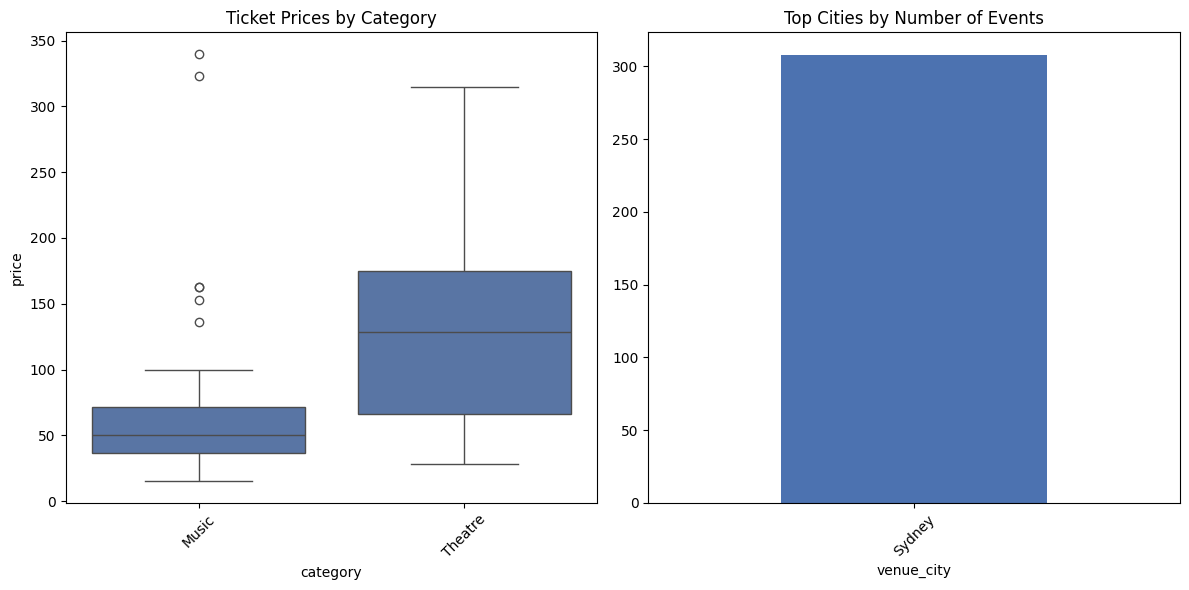

In [10]:
# Create visualizations
plt.figure(figsize=(12, 6))

# Price distribution by category
plt.subplot(1, 2, 1)
sns.boxplot(data=tickets_df.merge(
    events_df[['id', 'category']], 
    left_on='event_id', 
    right_on='id'
), x='category', y='price')
plt.xticks(rotation=45)
plt.title('Ticket Prices by Category')

# Events by city
plt.subplot(1, 2, 2)
events_df['venue_city'].value_counts().head().plot(kind='bar')
plt.title('Top Cities by Number of Events')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

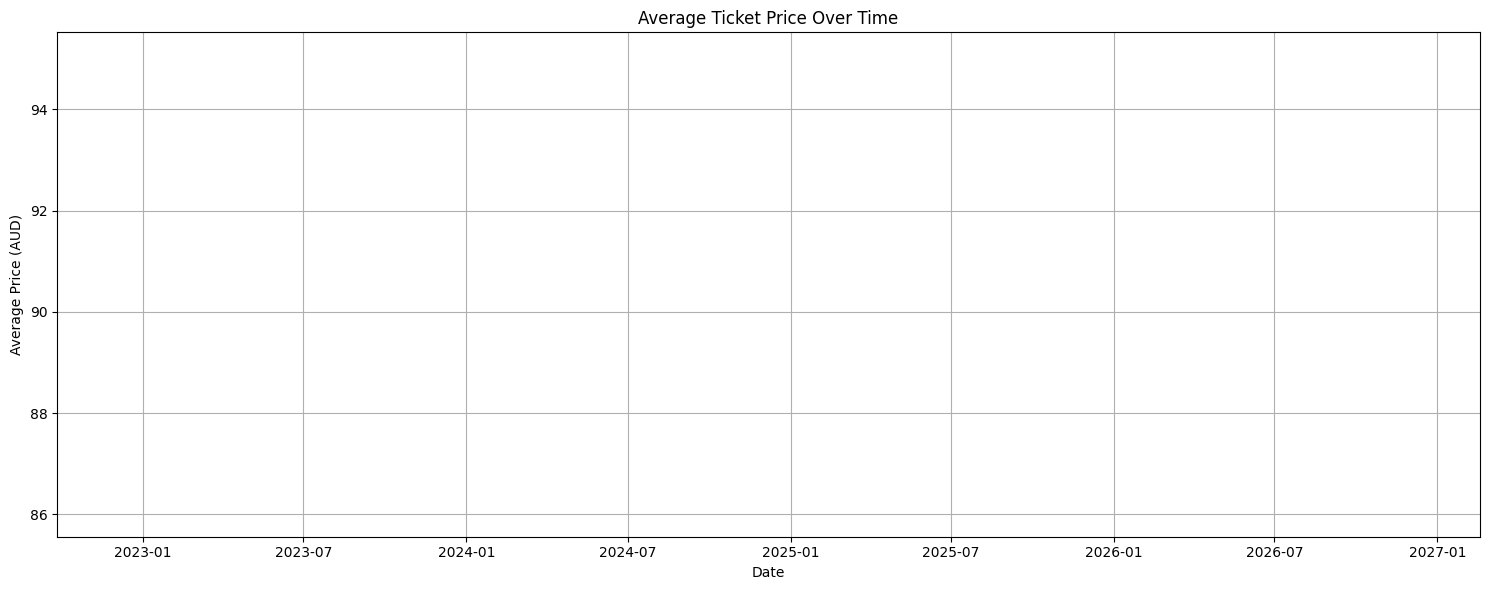

In [11]:
# Price trends over time
daily_prices = tickets_df.groupby(
    pd.Grouper(key='snapshot_timestamp', freq='D')
)['price'].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_prices['snapshot_timestamp'], daily_prices['price'])
plt.title('Average Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (AUD)')
plt.grid(True)
plt.tight_layout()